In [1]:
library(tidyverse)
library(geomtextpath)
library(cowplot)
library(ragg)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.3     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'cowplot'


The following object is masked from 'package:lubridate':

    stamp




In [2]:
library(RcppCNPy)

mv.theta = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/th_grp_mv.npy')
mv.magni = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/rd_grp_mv.npy')
mv.color = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/color_grp_mv.npy')
sf.parc  = read.csv('/Users/weiwei/Documents/Work/PARIS/Zone_HSV_movie/mmp_parc.csv')
sf.yeo7  = read.csv('/Users/weiwei/Documents/Work/PARIS/Zone_HSV_movie/yeo_net7.csv')
sf.brod  = read.csv('/Users/weiwei/Documents/Work/PARIS/Zone_HSV_movie/brodmann_32k.csv')
rs.theta = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/th_grp_rs.npy')
rs.magni = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/rd_grp_rs.npy')
rs.color = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/color_grp_rs.npy')
cls.state = read.csv('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/comp_mv_rs_cls.csv')

In [3]:
sf.nets = factor(sf.yeo7[,2], 
                    levels = c(0, 1, 2, 3, 4, 6, 7, 5),
                    labels = c('NA', 'VN', 'SMN', 'DAN', 'VAN', 'FPN', 'DMN', 'LN'))
df_mv = data.frame(mv.theta, mv.magni, sf.nets, sf.parc[,2], sf.brod[,2], rgb(mv.color))
df_rs = data.frame(rs.theta, rs.magni, sf.nets, sf.parc[,2], sf.brod[,2], rgb(rs.color))
colnames(df_mv) = c('theta', 'magnitude', 'Yeo7', 'MMP', 'Brodmann', 'Color')
colnames(df_rs) = c('theta', 'magnitude', 'Yeo7', 'MMP', 'Brodmann', 'Color')
head(df_mv)
head(df_rs)
str(df_mv)
str(df_rs)

,theta,magnitude,Yeo7,MMP,Brodmann,Color
,<dbl>,<dbl>,<fct>,<int>,<int>,<chr>
1,0.9776731,0.2788877,DMN,35,67,#DBD79E
2,2.0580176,0.8190907,SMN,52,59,#2EDB28
3,3.2059874,0.6495430,SMN,12,56,#4DD3DB
4,3.3685823,0.1753379,DMN,26,54,#B5D3DB
5,6.2700093,0.9808285,VN,13,87,#DB0407
6,1.4277650,0.1079935,FPN,149,64,#D3DBC4


,theta,magnitude,Yeo7,MMP,Brodmann,Color
,<dbl>,<dbl>,<fct>,<int>,<int>,<chr>
1,1.3323689,0.2437427,DMN,35,67,#CDDBA6
2,2.1050168,0.8469307,SMN,52,59,#22DB23
3,1.8434918,0.5965562,SMN,12,56,#78DB58
4,1.8939206,0.1331403,DMN,26,54,#C4DBBE
5,0.4656543,0.9632728,VN,13,87,#DB6608
6,5.8439062,0.1887193,FPN,149,64,#DBB2C3


'data.frame':	59412 obs. of  6 variables:
 $ theta    : num  0.978 2.058 3.206 3.369 6.27 ...
 $ magnitude: num  0.279 0.819 0.65 0.175 0.981 ...
 $ Yeo7     : Factor w/ 8 levels "NA","VN","SMN",..: 7 3 3 7 2 6 6 2 7 3 ...
 $ MMP      : int  35 52 12 26 13 149 85 153 133 102 ...
 $ Brodmann : int  67 59 56 54 87 64 82 79 76 72 ...
 $ Color    : chr  "#DBD79E" "#2EDB28" "#4DD3DB" "#B5D3DB" ...
'data.frame':	59412 obs. of  6 variables:
 $ theta    : num  1.332 2.105 1.843 1.894 0.466 ...
 $ magnitude: num  0.244 0.847 0.597 0.133 0.963 ...
 $ Yeo7     : Factor w/ 8 levels "NA","VN","SMN",..: 7 3 3 7 2 6 6 2 7 3 ...
 $ MMP      : int  35 52 12 26 13 149 85 153 133 102 ...
 $ Brodmann : int  67 59 56 54 87 64 82 79 76 72 ...
 $ Color    : chr  "#CDDBA6" "#22DB23" "#78DB58" "#C4DBBE" ...


Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


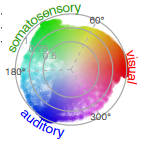

In [15]:
options(repr.plot.width = 30/25.4, repr.plot.height = 30/25.4)
# options(repr.plot.width = 5, repr.plot.height = 5)

sz.circ.label = 2
sz.circ.curve = 8
line.size = 0.25

circ.mv <- ggplot(df_mv, aes(x = theta * 360 / (2 * pi), y = magnitude))+
                ggrastr::geom_point_rast(alpha = 0.1, size = 0.5, color = rgb(mv.color)) +
                geom_hline(yintercept = c(0.5, 0.75, 1), color = "grey65", size = line.size) +
                geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = line.size, linetype = "dashed") +
                labs(x = NULL, y = NULL) +
                scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), labels = c("visual", "somatosensory", "auditory")) +
                scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
                annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = sz.circ.label) +
                annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = sz.circ.label) +
                annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = sz.circ.label) +
                #annotate("text", x = 190, y = 0.2, label = "G1", color = "#545252", size = 6) +
                coord_curvedpolar(theta = "x", direction = -1, start = 4.75, clip = "off") +
                theme_void() +
                theme(legend.position = "none",
                    panel.background = element_rect(fill = "transparent", colour = NA_character_),
                    axis.ticks = element_line(size = line.size),
                    axis.text.x = element_text(size = sz.circ.curve, color = c("red", "#309617", "blue")),
                    panel.grid.major = element_blank(), 
                    panel.grid.minor = element_blank())

print(circ.mv)

Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


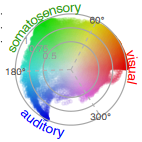

In [6]:
options(repr.plot.width = 30/25.4, repr.plot.height = 30/25.4)

sz.circ.label = 2
sz.circ.curve = 8
line.size = 0.25

circ.rs <- ggplot(df_rs, aes(x = theta * 360 / (2 * pi), y = magnitude))+
                ggrastr::geom_point_rast(alpha = 0.1, size = 0.5, color = rgb(rs.color)) +
                geom_hline(yintercept = c(0.5, 0.75, 1), color = "grey65", size = line.size) +
                geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = line.size, linetype = "dashed") +
                labs(x = NULL, y = NULL) +
                scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), labels = c("visual", "somatosensory", "auditory")) +
                scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
                annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = sz.circ.label) +
                annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = sz.circ.label) +
                annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = sz.circ.label) +
                annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = sz.circ.label) +
                #annotate("text", x = 190, y = 0.2, label = "G1", color = "#545252", size = 6) +
                coord_curvedpolar(theta = "x", direction = -1, start = 4.75, clip = "off") +
                theme_void() +
                theme(legend.position = "none",
                    panel.background = element_rect(fill = "transparent", colour = NA_character_),
                    axis.ticks = element_line(size = line.size),
                    axis.text.x = element_text(size = sz.circ.curve, color = c("red", "#309617", "blue")),
                    panel.grid.major = element_blank(), 
                    panel.grid.minor = element_blank())

print(circ.rs)

In [7]:
img.sf.rs.lat.l = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_05/surf_rs_lateral_L.png'
img.sf.rs.lat.r = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_05/surf_rs_lateral_R.png'
img.sf.rs.med.l = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_05/surf_rs_medial_L.png'
img.sf.rs.med.r = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_05/surf_rs_medial_R.png'

img.sf.mv.lat.l = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_lateral_L.png'
img.sf.mv.lat.r = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_lateral_R.png'
img.sf.mv.med.l = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_medial_L.png'
img.sf.mv.med.r = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_02/surf_mv_medial_R.png'

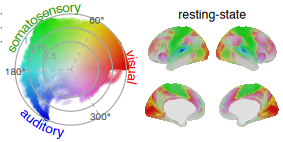

In [8]:
options(repr.plot.width = 60/25.4, repr.plot.height = 30/25.4)

scl = 0.6
cow.f5.base = plot_grid(circ.rs, NULL, nrow=1, rel_widths= c(1,1))
cow.f5.rs   = ggdraw(cow.f5.base) +
                draw_image(img.sf.rs.lat.l, x = 0.47, y = 0.35, scale = scl, halign=0, valign=0) +
                draw_image(img.sf.rs.lat.r, x = 0.72, y = 0.35, scale = scl, halign=0, valign=0) +
                draw_image(img.sf.rs.med.l, x = 0.47, y = -0.05, scale = scl, halign=0, valign=0) +
                draw_image(img.sf.rs.med.r, x = 0.72, y = -0.05, scale = scl, halign=0, valign=0) +
                annotate(geom='text', x = 0.75, y = 0.9, label = 'resting-state', size = 2.5)

ggdraw(cow.f5.rs)

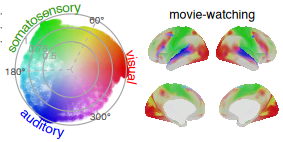

In [9]:
options(repr.plot.width = 60/25.4, repr.plot.height = 30/25.4)

scl = 0.6
cow.f5.base = plot_grid(circ.mv, NULL, nrow=1, rel_widths= c(1,1))
cow.f5.mv   = ggdraw(cow.f5.base) +
                draw_image(img.sf.mv.lat.l, x = 0.47, y = 0.35, scale = scl, halign=0, valign=0) +
                draw_image(img.sf.mv.lat.r, x = 0.72, y = 0.35, scale = scl, halign=0, valign=0) +
                draw_image(img.sf.mv.med.l, x = 0.47, y = -0.05, scale = scl, halign=0, valign=0) +
                draw_image(img.sf.mv.med.r, x = 0.72, y = -0.05, scale = scl, halign=0, valign=0) +
                annotate(geom='text', x = 0.75, y = 0.9, label = 'movie-watching', size = 2.5)

ggdraw(cow.f5.mv)

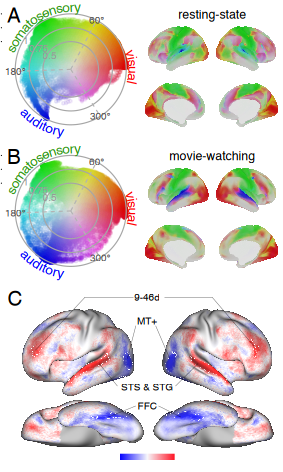

In [10]:
img.sf.comp = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_05/surf_com.png'
img.lg.comp = '/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/vector/f_05/legend.svg'

options(repr.plot.width = 60/25.4, repr.plot.height = 100/25.4)
# options(repr.plot.width = 6, repr.plot.height = 10)

scl = 0.5
cow.f5.base = plot_grid(cow.f5.rs, cow.f5.mv, NULL, nrow=3, rel_heights= c(3,3,4), labels = c('A','B','C'), label_size = 12, label_fontface='plain')
cow.f5.comp = ggdraw(cow.f5.base) +
                draw_image(img.sf.comp, x = 0.07, y = 0.05, scale = 0.9, halign=0, valign=0) +
                draw_image(img.lg.comp, x = 0.42, y = 0.01, scale = 0.2, halign=0, valign=0) +
                annotate(geom='text',  x = 0.39, y = 0.031, label = '-0.3', hjust = 'center', size=1.5) +
                annotate(geom='text',  x = 0.65, y = 0.031, label = '0.3', hjust = 'center', size=1.5) +
                annotate(geom='text',  x = 0.53, y = 0.049, label = 'AVG(1-R)', hjust = 'center', size=1.5) +

                annotate(geom='curve', x = 0.125, y = 0.258, xend = 0.3, yend = 0.37, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='curve', x = 0.3, y = 0.37, xend = 0.47, yend = 0.37, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='text',  x = 0.52, y = 0.37, label = '9-46d', hjust = 'center', size=2) +
                annotate(geom='curve', x = 0.58, xend = 0.75, y = 0.37, yend = 0.37, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='curve', x = 0.75, xend = 0.9, y = 0.37, yend = 0.265, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1)+

                annotate(geom='curve', x = 0.45, y = 0.24, xend = 0.48, yend = 0.31, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='curve', x = 0.6, y = 0.24, xend = 0.55, yend = 0.31, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='text',  x = 0.52, y = 0.32, label = 'MT+', hjust = 'center', size=2) +

                annotate(geom='curve', x = 0.35, y = 0.23, xend = 0.415, yend = 0.182, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='curve', x = 0.7, y = 0.23, xend = 0.62, yend = 0.182, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='text',  x = 0.52, y = 0.18, label = 'STS & STG', hjust = 'center', size=2) +

                annotate(geom='curve', x = 0.38, y = 0.116, xend = 0.48, yend = 0.14, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='curve', x = 0.56, y = 0.14, xend = 0.64, yend = 0.116, curvature=0, alpha=0.6, color='black', linetype = "solid", size=0.1) +
                annotate(geom='text',  x = 0.52, y = 0.14, label = 'FFC', hjust = 'center', size=2)  

ggdraw(cow.f5.comp)

In [13]:
sf.nets = factor(sf.yeo7[,2], 
                    levels = c(0, 1, 2, 3, 4, 6, 7, 5),
                    labels = c('NA', 'VN', 'SMN', 'DAN', 'VAN', 'FPN', 'DMN', 'LN'))
df_all = rbind(df_mv, df_rs)
str(df_all)
head(df_all)

'data.frame':	118824 obs. of  6 variables:
 $ theta    : num  0.978 2.058 3.206 3.369 6.27 ...
 $ magnitude: num  0.279 0.819 0.65 0.175 0.981 ...
 $ Yeo7     : Factor w/ 8 levels "NA","VN","SMN",..: 7 3 3 7 2 6 6 2 7 3 ...
 $ MMP      : int  35 52 12 26 13 149 85 153 133 102 ...
 $ Brodmann : int  67 59 56 54 87 64 82 79 76 72 ...
 $ Color    : chr  "#DBD79E" "#2EDB28" "#4DD3DB" "#B5D3DB" ...


,theta,magnitude,Yeo7,MMP,Brodmann,Color
,<dbl>,<dbl>,<fct>,<int>,<int>,<chr>
1,0.9776731,0.2788877,DMN,35,67,#DBD79E
2,2.0580176,0.8190907,SMN,52,59,#2EDB28
3,3.2059874,0.6495430,SMN,12,56,#4DD3DB
4,3.3685823,0.1753379,DMN,26,54,#B5D3DB
5,6.2700093,0.9808285,VN,13,87,#DB0407
6,1.4277650,0.1079935,FPN,149,64,#D3DBC4


In [14]:
state = c(rep('mv', 59412), rep('rs', 59412))
comps = rbind(cls.state, cls.state)
clus = factor(comps[,1], 
                    levels = c(0, 1, 2, 3, 4),
                    labels = c('NA', 'STS & STG', 'MT+', '9-46', 'FFC'))
df_all$clus = clus
df_all$state = factor(state)

head(df_all)

,theta,magnitude,Yeo7,MMP,Brodmann,Color,clus,state
,<dbl>,<dbl>,<fct>,<int>,<int>,<chr>,<fct>,<fct>
1,0.9776731,0.2788877,DMN,35,67,#DBD79E,NA,mv
2,2.0580176,0.8190907,SMN,52,59,#2EDB28,NA,mv
3,3.2059874,0.6495430,SMN,12,56,#4DD3DB,NA,mv
4,3.3685823,0.1753379,DMN,26,54,#B5D3DB,NA,mv
5,6.2700093,0.9808285,VN,13,87,#DB0407,NA,mv
6,1.4277650,0.1079935,FPN,149,64,#D3DBC4,NA,mv


Warning message:
"Vectorized input to `element_text()` is not officially supported.
i Results may be unexpected or may change in future versions of ggplot2."


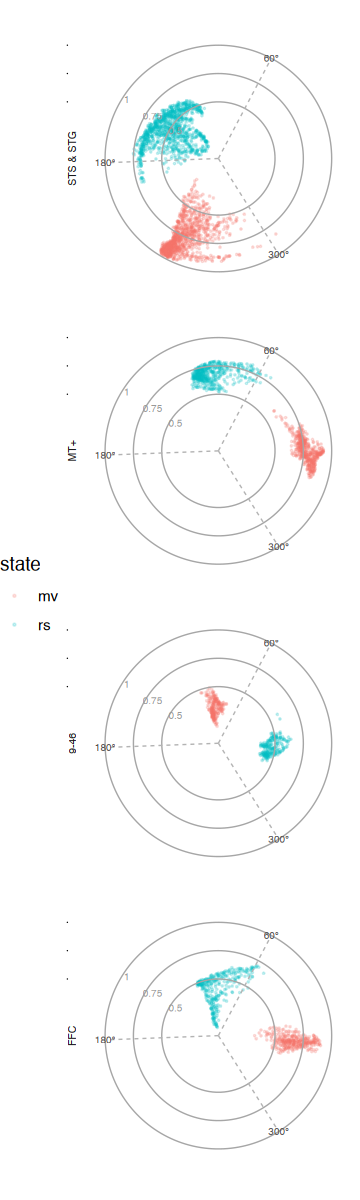

In [16]:
options(repr.plot.width = 3, repr.plot.height = 10)

df_clus = df_all[(df_all$clus!='NA'),]
p1 = ggplot(df_clus, aes(x = theta * 360 / (2 * pi), y = magnitude)) +
        ggrastr::geom_point_rast(alpha=0.2, size=0.2, aes(color=state)) +
        geom_hline(yintercept = c(0.5, 0.75, 1), color = "grey65", size = 0.3) +
        geom_vline(xintercept = c(60, 180, 300), color = "grey70", size = 0.3, linetype = "dashed") +
        labs(x = NULL, y = NULL) +
        scale_x_continuous(limits = c(0, 360), breaks = c(0, 120, 240), , labels = c(' ', ' ', ' ')) +
        scale_y_continuous(limits = c(0, 1), breaks = c(0.5, 0.75, 1), labels = NULL) +
        annotate("text", x = 145, y = 0.45, label = "0.5", color = "grey60", size = 2) +
        annotate("text", x = 145, y = 0.69, label = "0.75", color = "grey60", size = 2) +
        annotate("text", x = 145, y = 0.96, label = "1", color = "grey60", size = 2) +
        annotate("text", x = 60, y = 1, label = "60\u00B0", color = "#545252", size = 2) +
        annotate("text", x = 180, y = 1, label = "180\u00B0", color = "#545252", size = 2) +
        annotate("text", x = 300, y = 1, label = "300\u00B0", color = "#545252", size = 2) +
        coord_curvedpolar(theta = "x", direction = -1, start = 4.75, clip = "off") +
        theme_void() +
        theme(legend.position = "left",
                panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                axis.ticks = element_line(size = 0.3),
                axis.text.x = element_text(size = 16, color = c("red", "#309617", "blue"), face = "bold"),
                panel.grid.major = element_blank(), 
                panel.grid.minor = element_blank(),
                strip.text = element_text(size = 6, color = 'grey10', angle=90),
                strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5)) +
        facet_wrap(~clus, nrow=4, strip.position = "left")

print(p1)

In [14]:
rgba.cls.mv = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/cls_mv_rgba.npy')
rgba.cls.rs = npyLoad('/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/cls_rs_rgba.npy')
str(rgba.cls.mv)
str(rgba.cls.rs)

 num [1:668, 1:3] 0.0925 0.0451 0.0999 0.1155 0.1402 ...
 num [1:668, 1:3] 0.36027 0.00295 0.01464 0.01315 0.04861 ...


In [15]:
cls.state = c(rep('mv', 668*3), rep('rs', 668*3))
cls.clust = rep(c(rep('STS & STG', 167), rep('MT+', 167), rep('9-46', 167), rep('FFC', 167)), 2*3)
cls.modal = rep(c(rep('Visual',668), rep('Somatosensory',668), rep('Auditory',668)), 2)

cls.clust = factor(cls.clust, levels = c('STS & STG', 'MT+', '9-46', 'FFC'))
cls.modal = factor(cls.modal, levels = c('Visual', 'Somatosensory', 'Auditory'))

rgba.cls = c(rgba.cls.mv[,1], rgba.cls.mv[,2], rgba.cls.mv[,3], rgba.cls.rs[,1], rgba.cls.rs[,2], rgba.cls.rs[,3])
df.state.cls = data.frame(rgba.cls, cls.modal, cls.state, cls.clust)
colnames(df.state.cls) = c('Betas', 'Modal', 'state', 'cluster')

head(df.state.cls)
str(df.state.cls)

,Betas,Modal,state,cluster
,<dbl>,<fct>,<chr>,<fct>
1,0.09251883,Visual,mv,STS & STG
2,0.04514184,Visual,mv,STS & STG
3,0.09986295,Visual,mv,STS & STG
4,0.11547867,Visual,mv,STS & STG
5,0.14024443,Visual,mv,STS & STG
6,0.08721340,Visual,mv,STS & STG


'data.frame':	4008 obs. of  4 variables:
 $ Betas  : num  0.0925 0.0451 0.0999 0.1155 0.1402 ...
 $ Modal  : Factor w/ 3 levels "Visual","Somatosensory",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state  : chr  "mv" "mv" "mv" "mv" ...
 $ cluster: Factor w/ 4 levels "STS & STG","MT+",..: 1 1 1 1 1 1 1 1 1 1 ...


In [16]:
library(ggstatsplot)

options(repr.plot.width = 5, repr.plot.height = 20)

p2 = ggwithinstats(data = df.state.cls, x = modal, y = rgb, aes(color=state)) +
            facet_wrap(~cluster, nrow=4)

print(p2)

You can cite this package as:
     Patil, I. (2021). Visualizations with statistical details: The 'ggstatsplot' approach.
     Journal of Open Source Software, 6(61), 3167, doi:10.21105/joss.03167



ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31mx[39m Column `modal` doesn't exist.


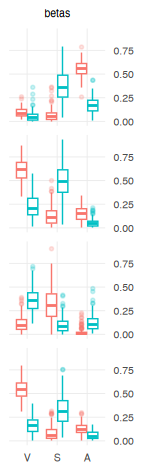

In [38]:
options(repr.plot.width = 30/25.4, repr.plot.height = 100/25.4)

p2 = ggplot(df.state.cls, aes(x = Modal, y = Betas)) +
        geom_boxplot(aes(color=state), outlier.size = 0.5, outlier.alpha = 0.2, size=0.3) +
        scale_x_discrete(labels = c('V','S','A')) +
        scale_y_continuous(guide = guide_axis(position='right')) +
        theme_minimal() +
        facet_wrap(~cluster, nrow=4, strip.position = "right") +
        labs(title='betas') +
        theme(legend.position = "none",
                panel.background = element_rect(fill = "transparent", colour = 'transparent'),
                axis.title = element_blank(),
                axis.text.x = element_text(size = 6),
                axis.text.y = element_text(size = 6),
                panel.grid.major = element_line(size=0.2), 
                panel.grid.minor = element_blank(),
                # strip.text = element_text(size = 6, color = 'grey10'),
                strip.text = element_blank(),
                strip.background = element_rect(fill = 'transparent', color = 'transparent', size = 0.5),
                plot.title = element_text(size = 6, face = "plain", hjust = 0.5)) 
        
        

print(p2)     

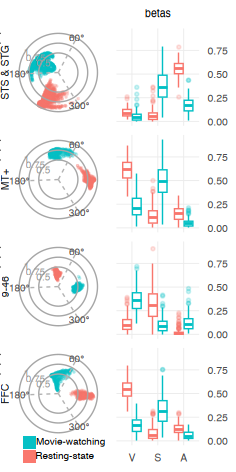

In [39]:
options(repr.plot.width = 50/25.4, repr.plot.height = 100/25.4)

# p1_shrink = plot_grid(p1,NULL, nrow=2, rel_heights=c(5, 0.5))
p12 = plot_grid(p1, p2, nrow=1, rel_widths=c(2.5,3)) +
        annotate(geom = 'rect', xmin = 0.1, xmax = 0.15, ymin = 0.05, ymax = 0.075, fill = '#06C0C5') +
        annotate(geom = 'rect', xmin = 0.1, xmax = 0.15, ymin = 0.02, ymax = 0.045, fill = '#FA786E') +
        annotate(geom = 'text', x = 0.3, y = 0.065, label = 'Movie-watching', size = 2, hjust = 'center') +
        annotate(geom = 'text', x = 0.3, y = 0.035, label = 'Resting-state', size = 2, hjust = 0.6)

ggdraw(p12)

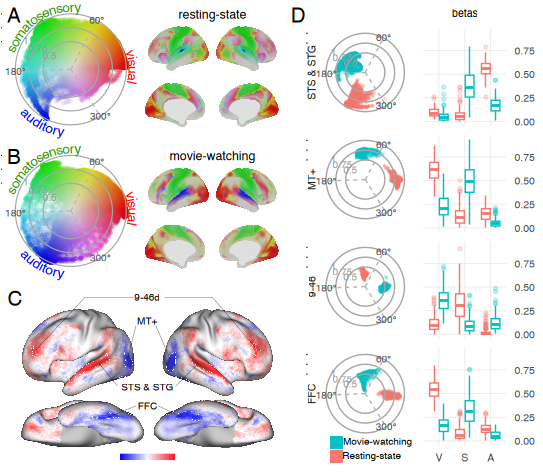

In [40]:
options(repr.plot.width = 115/25.4, repr.plot.height = 100/25.4)
cow.f5.final = plot_grid(cow.f5.comp, NULL, p12, nrow=1, rel_widths= c(6,0.5,5), labels=c('','D',''), label_size=12, label_fontface='plain')
ggdraw(cow.f5.final)

In [20]:
agg_png("/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/f_05_v5.png", 
           width = 11.5, height = 10, res = 600, units = 'cm', background = 'white')
print(cow.f5.final)
invisible(dev.off())

In [31]:
cowplot::ggsave2(path='/Users/weiwei/BaiduCloud/Work/Paris/HSV/Results_167_nnls/figs/ggplot/',filename='f_05_v6.pdf', width = 11.5,height = 10,units =  "cm", dpi = 600, plot=cow.f5.final)